In [45]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_csv = "data/city_data.csv"
city_df = pd.read_csv(city_csv)

ride_csv = "data/ride_data.csv"
ride_df = pd.read_csv(ride_csv)

# Combine the data into a single dataset
new_df = pd.merge(ride_df, city_df, how='left', on='city')
# Display the data table for preview


In [46]:
new_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [47]:
new_df["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [48]:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

## Bubble Plot of Ride Sharing Data

In [91]:
avg_fare_city = new_df.groupby("city")["fare"].mean()
#avg_fare_city = avg_fare_city.map('${:,.2f}'.format)
#avg_fare_city.head()

total_rides_city = new_df.groupby("city")["ride_id"].count()
total_drivers_city = new_df.groupby("city")["driver_count"].sum()

city_type = city_df.set_index("city")["type"]
#city_type.head()

# New df for bubble plot
bubble_df = pd.DataFrame({"Average Fare($) per City":avg_fare_city,
                          "Total Number of Rides per City": total_rides_city,
                          "Total Number of Drivers per City": total_drivers_city,
                          "City Type": city_type})


# Obtain the x and y coordinates for each of the three city types
# City Types
urban = bubble_df.loc[bubble_df["City Type"] == "Urban"]
suburban = bubble_df.loc[bubble_df["City Type"] == "Suburban"]
rural = bubble_df.loc[bubble_df["City Type"] == "Rural"]

# If City Types are the subject for the graphs then the other three data points must be represented in the graph
urban_x = urban["Total Number of Rides per City"]
urban_y = urban["Average Fare($) per City"]
urban_z = urban["Total Number of Drivers per City"] * 10

suburban_x = suburban["Total Number of Rides per City"]
suburban_y = suburban["Average Fare($) per City"]
suburban_z = suburban["Total Number of Drivers per City"] * 10

rural_x = rural["Total Number of Rides per City"]
rural_y = rural["Average Fare($) per City"]
rural_z = rural["Total Number of Drivers per City"] * 10


In [92]:
# 39
upper_limit_ride = bubble_df["Total Number of Rides per City"].max()
# 3
lower_limit_ride = bubble_df["Total Number of Rides per City"].min()

# '$43.28'
upper_limit_fare = bubble_df["Average Fare($) per City"].max()
# '$20.09'
lower_limit_fare = bubble_df["Average Fare($) per City"].min()

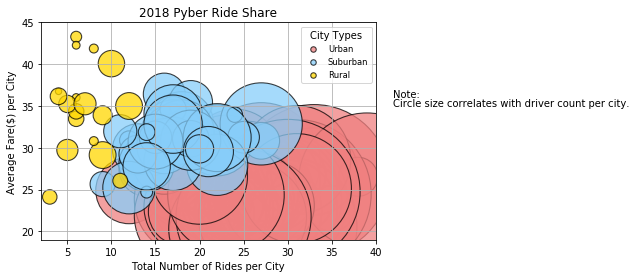

In [93]:
# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, color="lightcoral",edgecolors="black", s=urban_z, 
            marker="o", alpha=.75, linewidth=1.1, label="Urban")
plt.scatter(suburban_x, suburban_y, color="lightskyblue",edgecolors="black", s=suburban_z, 
            marker="o", alpha=.75, linewidth=1.1, label="Suburban")
plt.scatter(rural_x, rural_y, color="gold",edgecolors="black", s=rural_z, 
            marker="o", alpha=.75, linewidth=1.1, label="Rural")

# Incorporate the other graph properties
plt.xlim(2, 40)
plt.ylim(19, 45)

plt.title("2018 Pyber Ride Share")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare($) per City")
plt.grid()

# Create a legend
legend = plt.legend(title="City Types", loc="upper right", fontsize='small')
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,36, "Note:", wrap=True)
plt.text(42,35, "Circle size correlates with driver count per city.", wrap=True)

# Save Figure
plt.savefig("Bubble Plot of Ride Sharing Data.png")

plt.show()

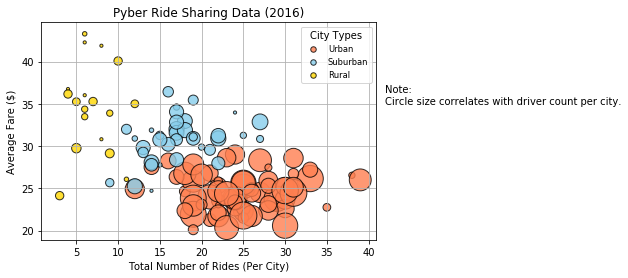

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

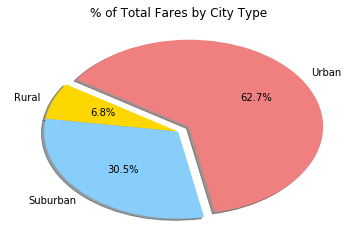

In [87]:
# Calculate Type Percents
total_fare_percent = new_df.groupby(['type'])['fare'].sum()

# Build Pie Chart
color = ['gold', 'lightskyblue','lightcoral']
explode = (0,0,0.1)

plt.pie(total_fare_percent, labels=total_fare_percent.index,
        autopct="%1.1f%%", colors=color, explode=explode,
        shadow=True, startangle=147)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total Fares by City Type")

# Show Figure
plt.show()

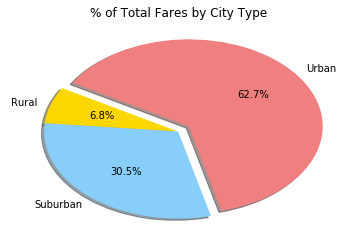

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

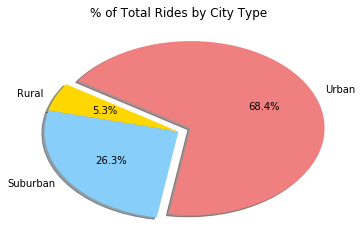

In [88]:
# Calculate Ride Percents
total_ride_percent = new_df.groupby(['type'])['ride_id'].count()

# Build Pie Chart
color1 = ['gold', 'lightskyblue','lightcoral']
explode1 = (0,0,0.1)

plt.pie(total_ride_percent, labels=total_ride_percent.index, autopct="%1.1f%%",
        colors=color1, explode=explode1,
        shadow = True, startangle = 147)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig('Total Rides by City Type')

# Show Figure
plt.show()

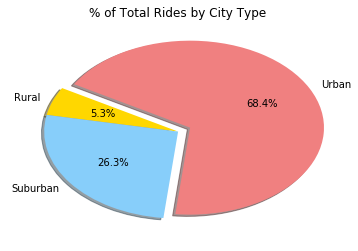

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

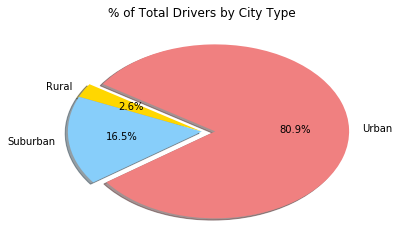

In [89]:
# Calculate Driver Percents
total_driver_percent = city_df.groupby(["type"])["driver_count"].sum()

# Build Pie Charts
color2 = ['gold', 'lightskyblue','lightcoral']
explode2 = (0,0,0.1)

plt.pie(total_driver_percent, labels=total_driver_percent.index, autopct="%1.1f%%",
        colors=color2, explode=explode2, shadow=True, startangle=147)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig('Total Drivers by City Type')

# Show Figure
plt.show()

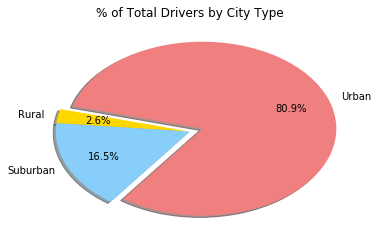

In [6]:
# Show Figure
plt.show()